<a href="https://colab.research.google.com/github/ducanhho2296/analyzing-Osmnx-Geopandas/blob/main/get_geospatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install geopandas
!pip install osmnx
!pip install contextily

In [ ]:
import geopandas
import osmnx as ox
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Get map of an Area

In [ ]:
center_point = (52.375,9.74)
#set radius to scan a region around center_point
center_dist = 500
bbox = ox.utils_geo.bbox_from_point(center_point, dist=center_dist)

#bbox contains information of 4 corners of the bounding map or min-max long-and lattitude
print(bbox)

(52.37949660167747, 52.37050339832253, 9.747365551820103, 9.732634448179898)


In [ ]:
graph=ox.graph_from_bbox(bbox[0],bbox[1],bbox[2],bbox[3],network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph)

##Get building 

In [ ]:
buildings = ox.geometries_from_bbox(bbox[0],bbox[1],bbox[2],bbox[3], tags={'building':True})

###Get Coordinates with GeoDataFrame from a DataFrame

###get coordinates of a location

In [ ]:
shops = []
shops = ox.geometries_from_point(center_point, tags={"shop": True}, dist = 50)

In [ ]:
shops.head()

addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                              
node         3095112743  Hannover           DE                5         30159   
             3637946051  Hannover           DE                8         30159   
             3637946052  Hannover           DE                5         30159   
             3637946053  Hannover           DE                6         30159   
             3760138557       NaN          NaN              NaN           NaN   

                           addr:street             brand brand:wikidata  \
element_type osmid                                                        
node         3095112743  Bahnhofstraße       Apple Store        Q421253   
             3637946051  Bahnhofstraße             Mango        Q136503   
             3637946052  Bahnhofstraße  Mobilcom Debitel        Q344744   
             3637946053  Bahnhofstraße  Mobilcom Debitel        Q344744   
             3760138557            NaN               NaN            NaN   

                             brand:wikipedia              name  \
element_type osmid                                               
node         3095112743       en:Apple Store       Apple Store   
             3637946051  en:Mango (retailer)             Mango   
             3637946052           en:Debitel  Mobilcom Debitel   
             3637946053           en:Debitel  Mobilcom Debitel   
             3760138557                  NaN   L tur Reisebüro   

                                             opening_hours  ...  \
element_type osmid                                          ...   
node         3095112743                  Mo-Sa 10:00-20:00  ...   
             3637946051                                NaN  ...   
             3637946052  Mo-Fr 10:00-19:00; Sa 10:00-18:00  ...   
             3637946053                                NaN  ...   
             3760138557                                NaN  ...   

                                         geometry                  note  \
element_type osmid                                                        
node         3095112743  POINT (9.73949 52.37500)                   NaN   
             3637946051  POINT (9.73995 52.37540)                   NaN   
             3637946052  POINT (9.73962 52.37512)                   NaN   
             3637946053  POINT (9.73971 52.37520)  2019-07-30: Im Umbau   
             3760138557  POINT (9.73927 52.37488)                   NaN   

                               wheelchair:description nodes building height  \
element_type osmid                                                            
node         3095112743                           NaN   NaN      NaN    NaN   
             3637946051                           NaN   NaN      NaN    NaN   
             3637946052                           NaN   NaN      NaN    NaN   
             3637946053                           NaN   NaN      NaN    NaN   
             3760138557  nur tresenhohe Servicetische   NaN      NaN    NaN   

                        indoor layer level room  
element_type osmid                               
node         3095112743    NaN   NaN   NaN  NaN  
             3637946051    NaN   NaN   NaN  NaN  
             3637946052    NaN   NaN   NaN  NaN  
             3637946053    NaN   NaN   NaN  NaN  
             3760138557    NaN   NaN   NaN  NaN  

[5 rows x 31 columns]

In [ ]:
shops['geometry']

element_type  osmid     
node          3095112743                             POINT (9.73949 52.37500)
              3637946051                             POINT (9.73995 52.37540)
              3637946052                             POINT (9.73962 52.37512)
              3637946053                             POINT (9.73971 52.37520)
              3760138557                             POINT (9.73927 52.37488)
              8224043346                             POINT (9.74064 52.37483)
              8224051542                             POINT (9.74068 52.37493)
              8224059288                             POINT (9.74055 52.37462)
way           186296457     POLYGON ((9.73974 52.37526, 9.73987 52.37536, ...
              436076586     POLYGON ((9.73944 52.37513, 9.73952 52.37509, ...
              436076587     POLYGON ((9.73927 52.37500, 9.73936 52.37497, ...
              436076588     POLYGON ((9.73932 52.37526, 9.73940 52.37522, ...
              436076590     POLYGON ((9

In [ ]:
shops['geometry']

##Plot map

In [ ]:
max_long = bbox[0]
min_long = bbox[1]
max_latt = bbox[2]
min_latt = bbox[3]

In [ ]:
step_long = (max_long - min_long) / 80
step_latt = (max_latt - min_latt) / 80

In [ ]:
a = []
b = []
for i in np.arange(min_long, max_long, step_long):
  a.append(i)
for i in np.arange(min_latt, max_latt, step_latt):
  b.append(i)

In [ ]:
# fig, ax = plt.subplots(figsize=(15,15))
# ax.set_facecolor((0.0, 0.0, 0.0))
# edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
# buildings.plot(ax=ax, facecolor='silver')
# shops.plot(ax=ax, facecolor='orange')

# plt.grid(color='b')
# plt.tight_layout()
# print(bbox)
# #max_long, min_long, max_latt, min_latt

###create raster 80x80 grids and 40x40 grids

####80x80

(52.37949660167747, 52.37050339832253, 9.747365551820103, 9.732634448179898)


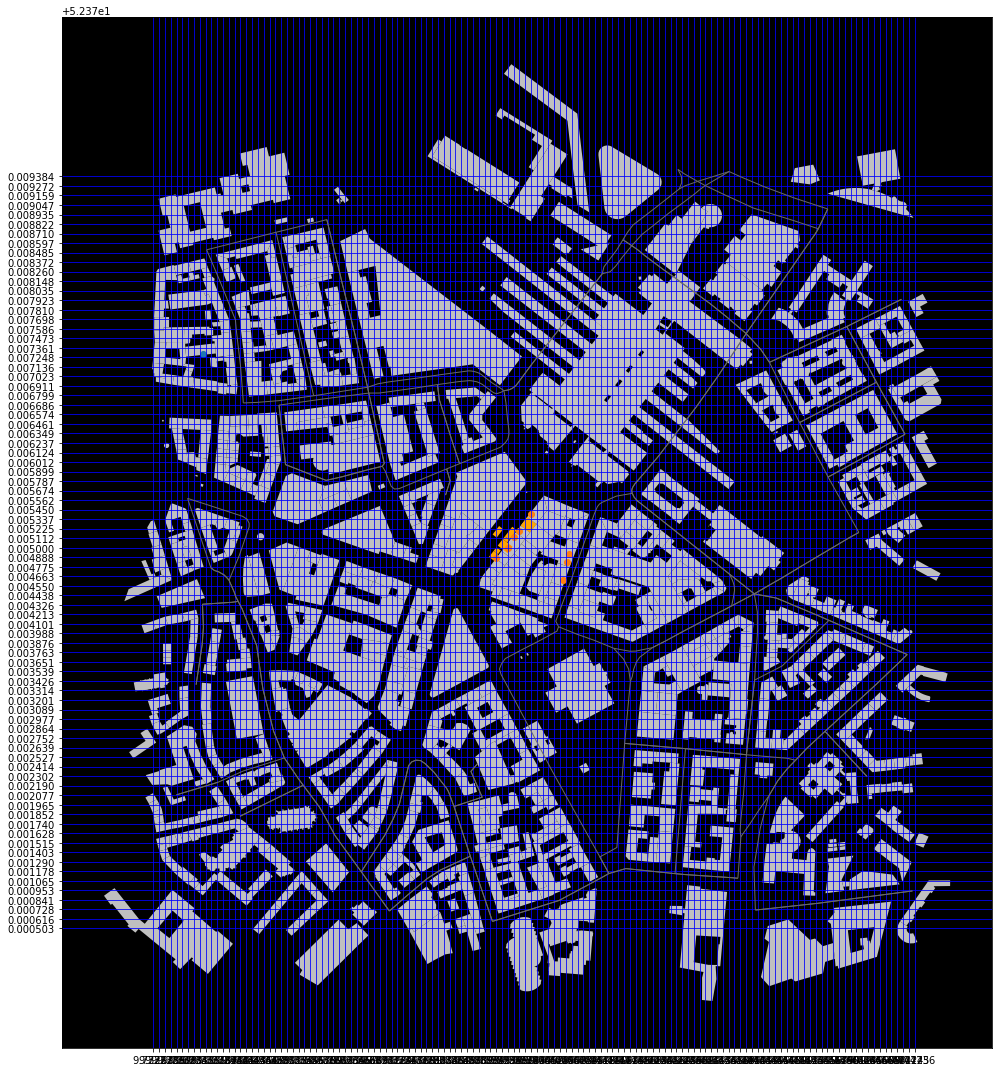

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
# ax.set_facecolor((0.0, 0.0, 0.0))
# edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
# buildings.plot(ax=ax, facecolor='silver')
# shop.plot(ax=ax, facecolor='red')
ax.set_xticks(np.arange(min_latt, max_latt, step_long))
ax.set_yticks(np.arange(min_long, max_long, step_long))
# plt.scatter(a, b)
ax.set_facecolor((0.0, 0.0, 0.0))
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='silver')
shops.plot(ax=ax, facecolor='orange')

plt.grid(color='b')
plt.tight_layout()
print(bbox)
#max_long, min_long, max_latt, min_latt

####40x40

(52.37949660167747, 52.37050339832253, 9.747365551820103, 9.732634448179898)


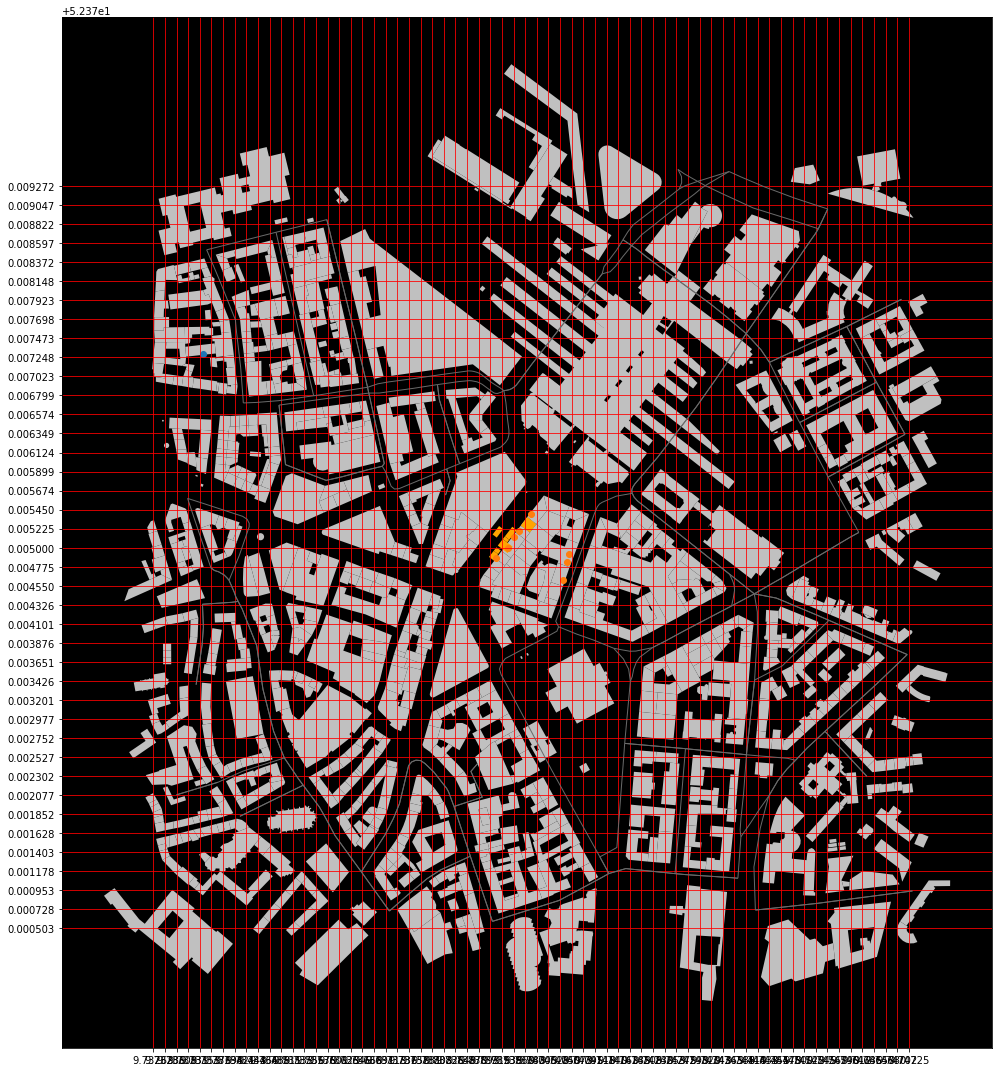

In [ ]:
step_long1 = (max_long - min_long) / 40
step_latt1 = (max_latt - min_latt) / 40

fig, ax = plt.subplots(figsize=(15,15))
# ax.set_facecolor((0.0, 0.0, 0.0))
# edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
# buildings.plot(ax=ax, facecolor='silver')
# shop.plot(ax=ax, facecolor='red')
ax.set_xticks(np.arange(min_latt, max_latt, step_long1))
ax.set_yticks(np.arange(min_long, max_long, step_long1))
# plt.scatter(a, b)
ax.set_facecolor((0.0, 0.0, 0.0))
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='silver')
shops.plot(ax=ax, facecolor='orange')

plt.grid(color='r')
plt.tight_layout()
print(bbox)

###mapping coordinates from original OSmap to 80x80 grids




In [ ]:
a1 = 9.73949 #longtitude
b1 =  52.37500 #lattitude

In [ ]:
a1_mapping = (a1 - min_latt) * (80 - 0) / (max_latt - min_latt) + 0
a1_mapping

37.23035008126177

In [ ]:
b1_mapping = (b1 - min_long) * (80 - 0) / (max_long - min_long) + 0
b1_mapping

40.0

###random center_points

In [ ]:
import random 

In [ ]:
latitude = [52.36, 52.38]
longitude = [9.71, 9.78]

In [ ]:
rand_points = []
rand_lats = []
rand_longs = []

for i in range(0,1000):
  rand_lat = round(random.uniform(52.36, 52.385),5)
  rand_long = round(random.uniform(9.71, 9.78),5)
  rand_lats.append(rand_lat)
  rand_longs.append(rand_long)
  # rand_points.append((rand_lat, rand_long))
  rand_points.append((rand_long, rand_lat))
  # print("{}:".format(i),rand_points[i])

In [ ]:
bbox = ox.utils_geo.bbox_from_point(rand_points[3], dist=250)
bbox

(52.38250830083873, 52.37801169916127, 9.759473214606736, 9.752106785393263)

####Create new Geodataframe of random center_points for plotting

In [ ]:
demo = pd.DataFrame(
    {
     'Latitude': rand_lats,
     'Longitude': rand_longs})
demo1 = gpd.GeoDataFrame(
    demo, geometry=gpd.points_from_xy(demo.Longitude, demo.Latitude))

In [ ]:
demo1

,Latitude,Longitude,geometry
0,52.36569,9.77838,POINT (9.77838 52.36569)
1,52.36164,9.74113,POINT (9.74113 52.36164)
2,52.36519,9.73944,POINT (9.73944 52.36519)
3,52.38026,9.75579,POINT (9.75579 52.38026)
4,52.37069,9.76620,POINT (9.76620 52.37069)
...,...,...,...
995,52.36463,9.73381,POINT (9.73381 52.36463)
996,52.38024,9.75683,POINT (9.75683 52.38024)
997,52.36820,9.74290,POINT (9.74290 52.36820)
998,52.38404,9.73138,POINT (9.73138 52.38404)
